In [950]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [951]:
df=pd.read_excel('final_feat.xlsx')

In [952]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [953]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


<AxesSubplot:>

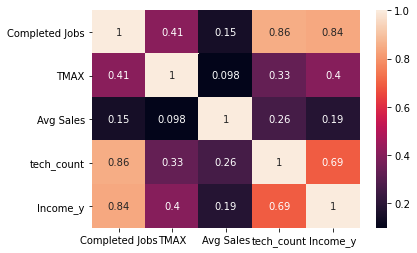

In [954]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [955]:
df1=df1.drop_duplicates(ignore_index=True)

In [956]:

df1['f1']=np.sqrt(df1['Completed Jobs']**3)*np.abs(df1['Avg Sales'])
df1['f2']=np.abs(np.sqrt(df1['Completed Jobs']) - np.sqrt(df1['tech_count']))
df1['f3']=np.log(np.sqrt(df1['Completed Jobs'])*df1['TMAX']**3)

<AxesSubplot:>

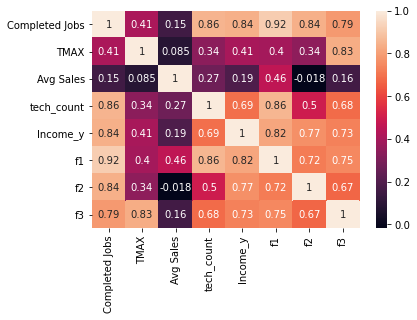

In [957]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [958]:
df1.columns

Index(['Completed Jobs', 'TMAX', 'Avg Sales', 'tech_count', 'Income_y', 'f1',
       'f2', 'f3'],
      dtype='object')

In [1349]:
df_2=df1[['Completed Jobs','TMAX','Avg Sales','Income_y', 'f1',
       'f2', 'f3']]

<AxesSubplot:>

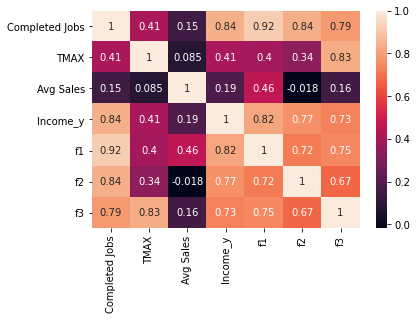

In [1350]:
sns.heatmap(df_2.corr(method='spearman'),annot=True)

In [1351]:
train=df_2[0:300]
test=df_2[300:]

In [1352]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [1353]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [1354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1355]:
from sklearn.ensemble import RandomForestRegressor


In [1356]:
# intializing the randomeforest regressor

random_forest_reg=RandomForestRegressor()

In [1357]:
# fit the X_train and y_train values to the model
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [1358]:
# training data set score
random_forest_reg.score(X_train,y_train)

0.9460341258943822

In [1359]:
# test data set score
random_forest_reg.score(X_test,y_test)

0.7339583974384629

In [1360]:
# test data set score
random_forest_reg.score(X_,y_)

0.4682874366890808

In [1361]:
y_pred_1=random_forest_reg.predict(X_)

In [1362]:
from sklearn import metrics

In [1363]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))

RMSE: 28190.384921421486
MAE: 21788.23459545454


In [1364]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

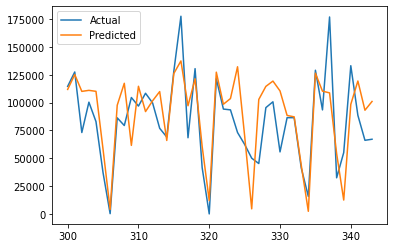

In [1365]:
comp.plot()

In [1366]:
comp['Error']=comp['Actual']-comp['Predicted']

In [1367]:
comp

,Actual,Predicted,Error
300,114534.21,111769.5841,2764.6259
301,127412.10,125129.6244,2282.4756
302,73107.94,110009.0690,-36901.1290
303,100335.70,110937.4326,-10601.7326
304,82920.44,110057.7807,-27137.3407
305,36992.00,57946.1719,-20954.1719
306,326.00,4112.1834,-3786.1834
307,86287.17,97571.5978,-11284.4278
308,79380.38,117277.2502,-37896.8702
309,104509.01,61581.3959,42927.6141


## Hyperparamter Optimization

In [1337]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,5,10,15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [1338]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42,n_jobs=-1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10,
                                                             15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [1339]:
rf_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [1340]:
rf_random.best_score_


0.5562636452533416

In [1341]:
tuned_model_1 = RandomForestRegressor(n_estimators=400,min_samples_split=5,min_samples_leaf=10,max_features='sqrt',max_depth=90,bootstrap=True)


In [1342]:
tuned_model_1.fit(X_train,y_train)

RandomForestRegressor(max_depth=90, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=5, n_estimators=400)

In [1343]:
tuned_model_1.score(X_train,y_train)

0.7409465699792361

In [1344]:
tuned_model_1.score(X_test,y_test)

0.774815684272361

In [1345]:
tuned_model_1.score(X_,y_)

0.4731072363562966

In [1347]:
y_pred_2=random_forest_reg.predict(X_)

In [1348]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_2))

RMSE: 27989.071746923295
MAE: 21377.753481818185


In [1368]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pred_2})

<AxesSubplot:>

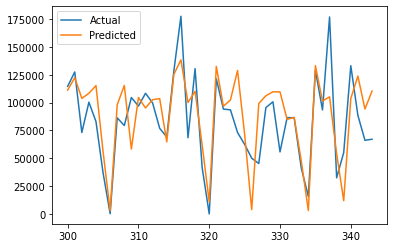

In [1369]:
comp_2.plot()

In [1370]:
comp_2['Error']=comp_2['Actual']-comp_2['Predicted']

In [1371]:
comp_2

,Actual,Predicted,Error
300,114534.21,111174.2666,3359.9434
301,127412.10,122313.6998,5098.4002
302,73107.94,103739.6798,-30631.7398
303,100335.70,108305.3683,-7969.6683
304,82920.44,115189.0259,-32268.5859
305,36992.00,56054.4063,-19062.4063
306,326.00,3029.1632,-2703.1632
307,86287.17,98000.7977,-11713.6277
308,79380.38,115315.4427,-35935.0627
309,104509.01,58257.6770,46251.3330
